<center> <h1>Cine y Datos</h1> </center>


<center> <h2>Analizando las publicaciones de CINEPREMIERE</h2> </center>



    
**Autor:** 

Nino Guzmán De la O

**Páginas personales**:

- <a href="https://www.linkedin.com/in/nino-guzman-6728981a2/ " title="LinkedIn">LinkedIn</a>

- <a href="https://ninogdo.medium.com" title="Medium">Medium</a>


### Introducción a web scraping y análisis de textos

In [1]:
import requests
from bs4 import BeautifulSoup

Información del sitio web que queremos analizar:

In [2]:
url = 'https://www.cinepremiere.com.mx/wp-json/wp/v2/posts'

Generamos el request y guardamos archivo JSON: 

In [3]:
headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
r = requests.get(url, headers=headers) # objeto response 
file_json = r.json() # archivo JSON

### Información útil
    
El objeto _r_ (response) contiene la siguiente información acerca del blog:

- X-WP-Total: Total de entradas en el sitio web
- X-WP-TotalPages: Total de número de páginas que contienen todas las entradas

    

In [4]:
print('Número de entradas: {0}, Número de páginas: {1}'.format(r.headers['X-WP-Total'], r.headers['X-WP-TotalPages']))

Número de entradas: 45416, Número de páginas: 4542


La lista _file_json_  tiene como elementos los diccionarios con la información del blog. Para el primer elemento tenemos:

In [5]:
file_json[0].keys()

dict_keys(['id', 'date', 'date_gmt', 'guid', 'modified', 'modified_gmt', 'slug', 'status', 'type', 'link', 'title', 'content', 'excerpt', 'author', 'featured_media', 'comment_status', 'ping_status', 'sticky', 'template', 'format', 'meta', 'categories', 'tags', 'yoast_head', 'amp_validity', 'amp_enabled', 'acf', '_links'])

Estamos interesados en el contenido de la publicación, que está en el valor del _key_ 'content':

In [6]:
contenido_entrada = file_json[0]['content']['rendered']
contenido_entrada


'\n<p>Las temporadas de <em>The Walking Dead</em>, la serie de televisión de horror postapocalíptico basada en la serie de cómics que lleva el mismo nombre lleva más de diez años adentrándonos en su mundo lleno de muertos vivientes. Desde 2010, la serie nos presentó a un grupo de sobrevivientes de un apocalipsis <em>zombie</em> que vive bajo la constante amenaza de los ‘caminantes’, como se le nombra a los <em>zombies</em> en la serie.</p>\n\n\n\n<p>Por más de diez temporadas <em>The Walking Dead </em>nos ha adentrado a su mundo apocalíptico, además de presentarnos a personajes que hagan lo que hagan entran a nuestro corazón. Sí, incluso Negan.</p>\n\n\n\n<p>Te presentamos de qué van cada una de las temporadas, que por cierto puedes encontrar completas en Netflix. Así que siéntate y agarra tus palomitas porque tu nueva serie favorita está aquí.</p>\n\n\n\n<figure class="wp-block-image size-large"><img loading="lazy" width="900" height="506" src="https://www.cinepremiere.com.mx/wp-conte

Información adicional de la entrada:

In [7]:
fecha_entrada = file_json[0]['date_gmt']
titulo_entrada = file_json[0]['title']['rendered']

In [8]:
print('Fecha de entrada: {0} \nTítulo de entrada: {1}'.format(fecha_entrada,titulo_entrada))


Fecha de entrada: 2021-06-17T17:58:07 
Título de entrada: Dónde ver The Walking Dead online, todas las temporadas de la serie


### Extraemos texto usando BeautifulSoup

In [9]:
texto_entrada = BeautifulSoup(contenido_entrada).get_text()
texto_entrada

'Las temporadas de The Walking Dead, la serie de televisión de horror postapocalíptico basada en la serie de cómics que lleva el mismo nombre lleva más de diez años adentrándonos en su mundo lleno de muertos vivientes. Desde 2010, la serie nos presentó a un grupo de sobrevivientes de un apocalipsis zombie que vive bajo la constante amenaza de los ‘caminantes’, como se le nombra a los zombies en la serie.\nPor más de diez temporadas The Walking Dead nos ha adentrado a su mundo apocalíptico, además de presentarnos a personajes que hagan lo que hagan entran a nuestro corazón. Sí, incluso Negan.\nTe presentamos de qué van cada una de las temporadas, que por cierto puedes encontrar completas en Netflix. Así que siéntate y agarra tus palomitas porque tu nueva serie favorita está aquí.\n\n¿De qué trata The Walking Dead?\nLa serie comienza con Rick Grimes, el personaje principal, quien despierta de un coma para descubrir que el mundo en el que vivía ya no es el mismo. Rick se encontrará a lo l

Limpiamos el texto:

In [16]:
import re
import string

def limpiar_texto(text):
    '''Convertimos a minúsculas, quitamos braquets y puntuacion'''
    text = text.lower() #
    text = re.sub('\[.*?¿-\”“]\%', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    '''Removemos puntuacion adicional'''
    text = re.sub('[‘’“”""…«»!¡]-', '', text)
    text = re.sub('\n', ' ', text)
    return text


In [17]:
texto_limpio = limpiar_texto(texto_entrada)
texto_limpio

'las temporadas de the walking dead  la serie de televisión de horror postapocalíptico basada en la serie de cómics que lleva el mismo nombre lleva más de diez años adentrándonos en su mundo lleno de muertos vivientes  desde   la serie nos presentó a un grupo de sobrevivientes de un apocalipsis zombie que vive bajo la constante amenaza de los ‘caminantes’  como se le nombra a los zombies en la serie  por más de diez temporadas the walking dead nos ha adentrado a su mundo apocalíptico  además de presentarnos a personajes que hagan lo que hagan entran a nuestro corazón  sí  incluso negan  te presentamos de qué van cada una de las temporadas  que por cierto puedes encontrar completas en netflix  así que siéntate y agarra tus palomitas porque tu nueva serie favorita está aquí   ¿de qué trata the walking dead  la serie comienza con rick grimes  el personaje principal  quien despierta de un coma para descubrir que el mundo en el que vivía ya no es el mismo  rick se encontrará a lo largo de l

### Visualizacion - Nube de palabras

In [12]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

wc = WordCloud(stopwords=stopwords.words('spanish'), background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)



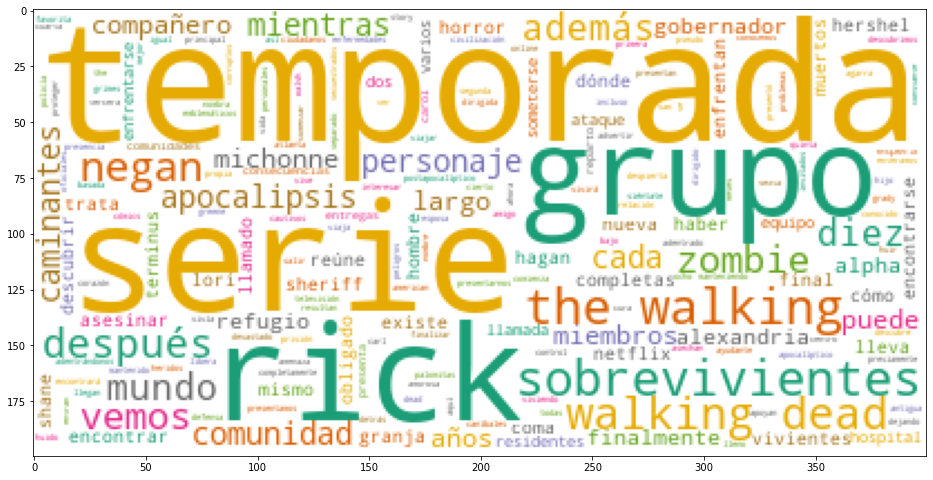

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]

wc.generate(texto_limpio)

#plt.imshow(wc, interpolation="bilinear")
plt.imshow(wc)
plt.show()